In [2]:
from scipy.sparse import csr_matrix,csc_matrix


movieId  1       2       3       6       7       10      11      13      \
userId                                                                    
200932      NaN     NaN     NaN     NaN     NaN     NaN     NaN     4.0   
200933      4.0     4.0     NaN     NaN     2.5     3.0     NaN     NaN   
200934      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
200935      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
200936      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
200937      NaN     3.0     NaN     NaN     NaN     NaN     NaN     NaN   
200938      4.5     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
200939      NaN     NaN     4.0     NaN     NaN     4.0     NaN     NaN   
200940      NaN     3.0     NaN     NaN     NaN     NaN     NaN     NaN   
200941      NaN     NaN     3.0     NaN     NaN     NaN     NaN     NaN   
200942      NaN     1.0     NaN     4.0     NaN     3.0     NaN     NaN   
200943      3.5     2.5  

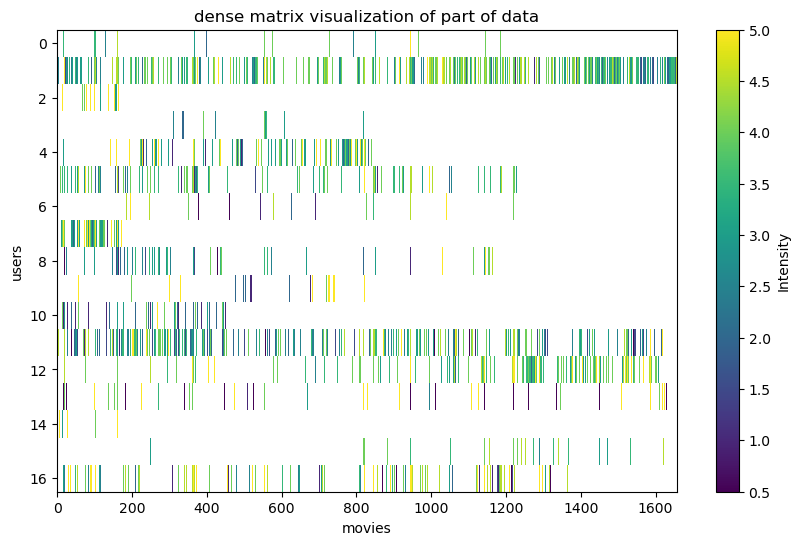

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import re
import time
import random
from scipy.stats import poisson, norm
import pandas as pd
from scipy.sparse import csr_matrix,csc_matrix



df = pd.read_csv('..\\data\\ratings.csv')


# het liefst heb je hieronder ipv df.tail(..) gewoon df (de hele dataset), maar dan krijg ik problemen.. 
matrix = pd.pivot_table(df.tail(3000), index='userId', columns='movieId', values='rating', aggfunc='mean')
print(matrix)

def visualizeData(dense_matrix):
    # Create a figure and axis
    plt.figure(figsize=(10, 6))
    plt.imshow(dense_matrix, cmap='viridis', aspect='auto', interpolation='none')
    plt.colorbar(label='Intensity')
    plt.title('dense matrix visualization of part of data')
    plt.xlabel('movies')
    plt.ylabel('users')

    # Show the plot
    plt.show()


    
m = matrix.to_numpy()
visualizeData(m)

In [19]:
m

array([[nan, nan, nan, ..., nan, nan, nan],
       [4. , 4. , nan, ..., 4. , 4.5, 3. ],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [4. , nan, nan, ..., nan, nan, nan],
       [5. , 1.5, nan, ..., nan, nan, nan]])

In [20]:
m_zero = np.nan_to_num(m, nan=0.0)

In [21]:
m_zero

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [4. , 4. , 0. , ..., 4. , 4.5, 3. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [4. , 0. , 0. , ..., 0. , 0. , 0. ],
       [5. , 1.5, 0. , ..., 0. , 0. , 0. ]])

In [27]:
m_zero = np.nan_to_num(m, nan=0.0)
m_s = csc_matrix(m_zero)


In [28]:
print(m_s)

  (1, 0)	4.0
  (6, 0)	4.5
  (11, 0)	3.5
  (12, 0)	4.0
  (15, 0)	4.0
  (16, 0)	5.0
  (1, 1)	4.0
  (5, 1)	3.0
  (8, 1)	3.0
  (10, 1)	1.0
  (11, 1)	2.5
  (16, 1)	1.5
  (7, 2)	4.0
  (9, 2)	3.0
  (10, 3)	4.0
  (11, 3)	3.5
  (14, 3)	4.0
  (1, 4)	2.5
  (11, 4)	4.5
  (1, 5)	3.0
  (7, 5)	4.0
  (10, 5)	3.0
  (11, 5)	3.5
  (14, 5)	5.0
  (16, 5)	3.0
  :	:
  (1, 1633)	4.0
  (1, 1634)	3.5
  (1, 1635)	2.0
  (1, 1636)	3.0
  (1, 1637)	3.0
  (1, 1638)	2.0
  (1, 1639)	3.5
  (1, 1640)	3.0
  (13, 1641)	0.5
  (1, 1642)	4.0
  (1, 1643)	3.5
  (1, 1644)	3.0
  (1, 1645)	3.5
  (1, 1646)	4.0
  (1, 1647)	3.5
  (1, 1648)	3.5
  (1, 1649)	3.0
  (1, 1650)	3.0
  (1, 1651)	3.5
  (1, 1652)	2.5
  (1, 1653)	2.0
  (1, 1654)	3.5
  (1, 1655)	4.0
  (1, 1656)	4.5
  (1, 1657)	3.0


In [29]:
m_s.nnz/np.prod(m.shape)

0.10643581920102178

In [30]:
m_s.nnz

3000

In [37]:
mu = np.mean(m_s.data)
sigma = np.std(m_s.data)

print(f'{mu} +-  {sigma}')



3.3918333333333335 +-  1.1053883053278406


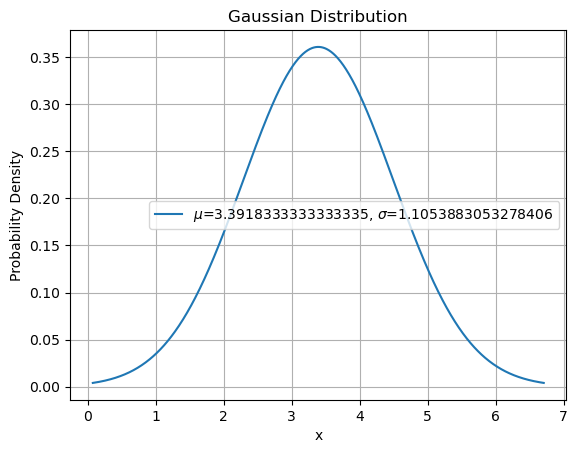

In [39]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_plot(mu, sigma):
    # Generate x values (from mu-3*sigma to mu+3*sigma for better visibility)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
    
    # Calculate the Gaussian function for each x
    y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)
    
    # Plot the Gaussian curve
    plt.plot(x, y, label=f'$\mu$={mu}, $\sigma$={sigma}')
    plt.title('Gaussian Distribution')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
gaussian_plot(mu, sigma)
